#Ejemplo 6: Predicción de spam
---



**Objetivo y comprensión del problema**

El objetivo del problema consisten en predecir la posibilidad de que un texto corresponda a un mensaje de spam. Cada una de las tuplas tiene un texto y una clasificación que se utilizará en el entrenamiento.

Se trata de un problema de clasificación.





## Paso 1: Gestión de los datos




Para la configuración de las bibliotecas a importar, se incluye Keras, scikit-learn y pandas.

Cabe destacar el uso de diferentes tipos de capas:

* [Embedding](https://keras.io/layers/embeddings/)
* [LSTM](https://keras.io/layers/recurrent/)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd


Using TensorFlow backend.


**1.1-Carga de datos**

En este caso, los datos están disponibles como un CSV que se carga desde un directorio.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

* Verificar dónde están nuestros datos.

In [0]:
!ls "/content/drive/My Drive"

* Cargar los datos en un dataset.

In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/spam.csv")

* Se cargan 5572 tuplas.

In [0]:
print (len(dataset))


5572


**1.2-Visualización de los datos**

*   Se puede comprobar la forma que tienen nuestros datos. En este caso,  5572 instancias con 2 dimensiones (clasificación y texto).


In [0]:
print(dataset.head(5))
print(dataset.columns.values)
print(dataset.info())
print(dataset.describe())

  Class                                               Text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
['Class' 'Text']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Class    5572 non-null object
Text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None
       Class                    Text
count   5572                    5572
unique     2                    5157
top      ham  Sorry, I'll call later
freq    4825                      30


**1.3-Codificar los datos**

En este caso los datos no son numéricos con lo que requieren procesamiento:

* Se separan los textos y las clases. Para ello, se proyecto la columna "Class" y se obtiene un índice (i) y su texto.
* Si la clase es "ham" se pone 0 y en otro caso "spam" se pone 1.
* Se convierten los arrays Python en arrays de numpy.




In [0]:
texts = []
classes = []
for i, label in enumerate(dataset['Class']):
    texts.append(dataset['Text'][i])
    if label == 'ham':
        classes.append(0)
    else:
        classes.append(1)
        
texts = np.asarray(texts)
classes = np.asarray(classes)

**1.4-Seleccionar los datos**

En este caso, no se utiliza procesamiento de lenguaje natural clásico. Esto correspondería con utilizar técncias de lematización, tokenización, normalización, etc. e incluso semantización de los tokens. Para conocer más sobre el procesamiento de lenguaje natural clásico se recomienda la biblioteca de Python [NLTK](https://www.nltk.org/).

El enfoque que se sigue en este caso es simplemente separar los tokens (palabras) y con ello generar vectores de descripción que después se utilizarán en el entrenamiento como instancias realizando comparaciones de cuán de lejos/cerca esta un vector de otro. Por lo tanto, se pasa de un entorno de texto a un entorno vectorial.

Como los vectores de entrada no tendrán el mismo número de palabras, se rellenan hasta el máximo (pad_sequences).

Finalmente, se barajan los datos transformados, vectores, para que formen aleatoriamente parte del entrenamiento y del test.




In [0]:
# number of words used as features
maxFeatures = 10000
# max document length
maxLen = 500

trainingData = int(len(texts) * .8)
validationData = int(len(texts) - trainingData)

# tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Se encontaron {0} palabras únicas: ".format(len(word_index)))
data = pad_sequences(sequences, maxlen=maxLen)
print("Forma de los datos: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = classes[indices]

X_train = data[:trainingData]
y_train = labels[:trainingData]
X_test = data[trainingData:]
y_test = labels[trainingData:]

Se encontaron 9006 palabras únicas: 
Forma de los datos:  (5572, 500)


## Paso 2: Arquitectura e implementación de nuestra red


1.   La entrada de nuestra red será una capa de Embeddings para procesar los vectores de dimensión 500 y generar una salida de 32. A continuación, la siguiente capa tomará estos 32 valores.
2.  La función de activación en la capa de salida será "sigmoid".  De esta forma, se clasificará en spam o no spam el vector de entrada.
3. La función de pérdida será  **binary_crossentropy**. Para realizar clasificación binaria.
4. La función de optimización **rmsprop**. 
5. Métricas: en este caso se selecciona sólo la precisión.



In [0]:
network = Sequential()
network.add(Embedding(maxFeatures, 64))
network.add(SpatialDropout1D(0.2))
network.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
network.add(Dense(3, activation='softmax'))
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




NameError: ignored

* Se puede mostrar la red generada en un fichero.

---



In [0]:
from keras.utils import plot_model
plot_model(network, to_file='/content/drive/My Drive/Colab Notebooks/images/network.png')



```
# This is formatted as code
```

## Paso 3:  Entrenamiento



En este caso el entrenamiento se realiza utilizando el 80% de los datos y el 20% para el test (validation_split)

In [0]:
history = network.fit(X_train, y_train, epochs=10, batch_size=60, validation_split=0.2)


Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 18s 5ms/step - loss: 0.5262 - acc: 0.8592 - val_loss: 0.3687 - val_acc: 0.8677
Epoch 2/10
3565/3565 [==============================] - 17s 5ms/step - loss: 0.2782 - acc: 0.8735 - val_loss: 0.2185 - val_acc: 0.9238
Epoch 3/10
3565/3565 [==============================] - 17s 5ms/step - loss: 0.1716 - acc: 0.9512 - val_loss: 0.1609 - val_acc: 0.9563
Epoch 4/10
3565/3565 [==============================] - 17s 5ms/step - loss: 0.1288 - acc: 0.9770 - val_loss: 0.1259 - val_acc: 0.9686
Epoch 5/10
3565/3565 [==============================] - 17s 5ms/step - loss: 0.1033 - acc: 0.9837 - val_loss: 0.1024 - val_acc: 0.9776
Epoch 6/10
3565/3565 [==============================] - 17s 5ms/step - loss: 0.0868 - acc: 0.9868 - val_loss: 0.0878 - val_acc: 0.9821
Epoch 7/10
3565/3565 [==============================] - 17s 5ms/step - loss: 0.0717 - acc: 0.9893 - val_loss: 0.0759 - val_acc: 0.9821
Epoch 8/

In [0]:
print("Accuracy (entrenamiento):",history.history['acc'])

Accuracy (entrenamiento): [0.8667601701420788, 0.8667601661294239, 0.8667601681357513, 0.8667601701420788, 0.8667601687209302, 0.8667601647082753, 0.8667601701420788, 0.8667601665474087, 0.8667601685537363, 0.8667601667146028]


## Paso 4:  Test y Predicción

En este caso, se va a validar con el conjunto de test:


*   Se pasa como parámetro los datos de test.
*   Se obtiene el valor de la predicción como una probabilidad.
*   Se muestra la matriz de confusión y se calcula "a mano" la precisión de esta validación.



In [0]:
pred = network.predict_classes(X_test)
acc = network.evaluate(X_test, y_test)
proba_rnn = network.predict_proba(X_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

1115/1115 [==============================] - 1s 1ms/step
Test loss is 0.40 accuracy is 0.86  
[[961 154]
 [  0   0]]


* Se muestra a continuación la precisión y pérdida por cada una de las iteraciones.

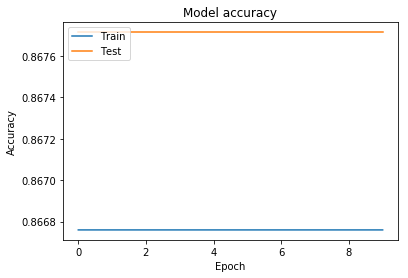

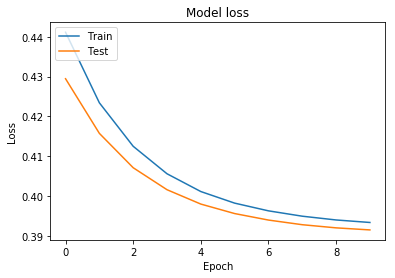

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Paso 6: Guardar configuración del modelo

In [0]:
network.save('/content/drive/My Drive/Colab Notebooks/models/ejemplo-6.h5')
network.summary()
from keras.models import load_model
network = load_model('/content/drive/My Drive/Colab Notebooks/models/ejemplo-6.h5')
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dens

#Tareas

1.   Cambiar el tipo de la función de pérdida y ver cómo afecta al resultado.
2.   Cambiar la función de optimización y ver cómo afecta al resultado.
3.   Cambiar la toplogía de la red.

#Otras referencias

* https://github.com/PacktPublishing/Keras-Deep-Learning-Cookbook/blob/master/Chapter04/spam-detection/spam_detection.py